In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

In [2]:
# ! kaggle datasets -d kritikseth/fruit-and-vegetable-image-recognition

In [3]:
# from zipfile import ZipFile

# data_ds = './fruit-and-vegetable-image-recognition.zip'

# with ZipFile(data_ds, 'r') as zip:
#     zip.extractall()
#     print('The data-set is extracted')

In [4]:
data_train_path = './Fruits_Vegetables/train/'
data_test_path =  './Fruits_Vegetables/test/'
data_val_path = './Fruits_Vegetables/validation/'

In [5]:
IMG_WIDTH = 180
IMG_HEIGHT = 180

In [6]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size = (IMG_WIDTH, IMG_HEIGHT),
    batch_size = 32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [7]:
data_cat = data_train.class_names

In [8]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size= (IMG_WIDTH, IMG_HEIGHT),
    batch_size = 32,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [9]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size = (IMG_WIDTH, IMG_HEIGHT),
    shuffle=False,
    batch_size = 32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


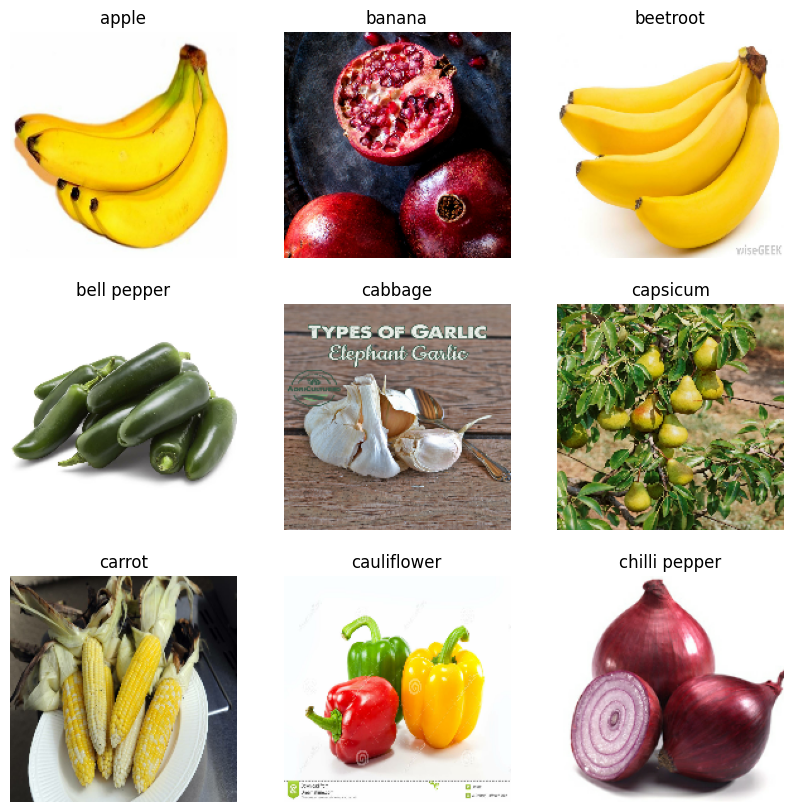

In [11]:
plt.figure(figsize=(10, 10))
for img, label in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(img[i].numpy().astype('uint8'))
        plt.title(data_cat[i])
        plt.axis('off')

In [2]:
from tensorflow.keras.models import Sequential

In [17]:
model = tf.keras.Sequential([
   layers.Rescaling(1./255),
   layers.Conv2D(16, (3,3), padding='same', activation='relu'),
   layers.MaxPooling2D(),
   
   layers.Conv2D(32, (3,3), padding='same', activation='relu'),
   layers.MaxPooling2D(),

   layers.Conv2D(64, (3,3), padding='same', activation='relu'),
   layers.MaxPooling2D(),

   layers.Flatten(),
   layers.Dropout(0.2),
   layers.Dense(128),
   layers.Dense(units=len(data_cat))
])

In [19]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

In [20]:
N_EPOCH = 25
history = model.fit(data_train, validation_data=data_val, epochs=N_EPOCH)

Epoch 1/25


I0000 00:00:1707554044.991199  101867 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


98/98 [==============================] - 26s 212ms/step - loss: 3.2660 - acc: 0.1079 - val_loss: 2.3138 - val_acc: 0.3219
Epoch 2/25
98/98 [==============================] - 20s 192ms/step - loss: 2.2583 - acc: 0.3541 - val_loss: 1.2264 - val_acc: 0.6467
Epoch 3/25
98/98 [==============================] - 19s 188ms/step - loss: 1.5746 - acc: 0.5413 - val_loss: 0.6647 - val_acc: 0.8433
Epoch 4/25
98/98 [==============================] - 19s 184ms/step - loss: 0.9139 - acc: 0.7422 - val_loss: 0.4477 - val_acc: 0.9117
Epoch 5/25
98/98 [==============================] - 19s 185ms/step - loss: 0.4767 - acc: 0.8709 - val_loss: 0.3713 - val_acc: 0.9316
Epoch 6/25
98/98 [==============================] - 19s 185ms/step - loss: 0.2958 - acc: 0.9136 - val_loss: 0.3180 - val_acc: 0.9345
Epoch 7/25
98/98 [==============================] - 19s 186ms/step - loss: 0.2315 - acc: 0.9377 - val_loss: 0.4796 - val_acc: 0.9345
Epoch 8/25
98/98 [==============================] - 19s 186ms/step - loss: 0.175

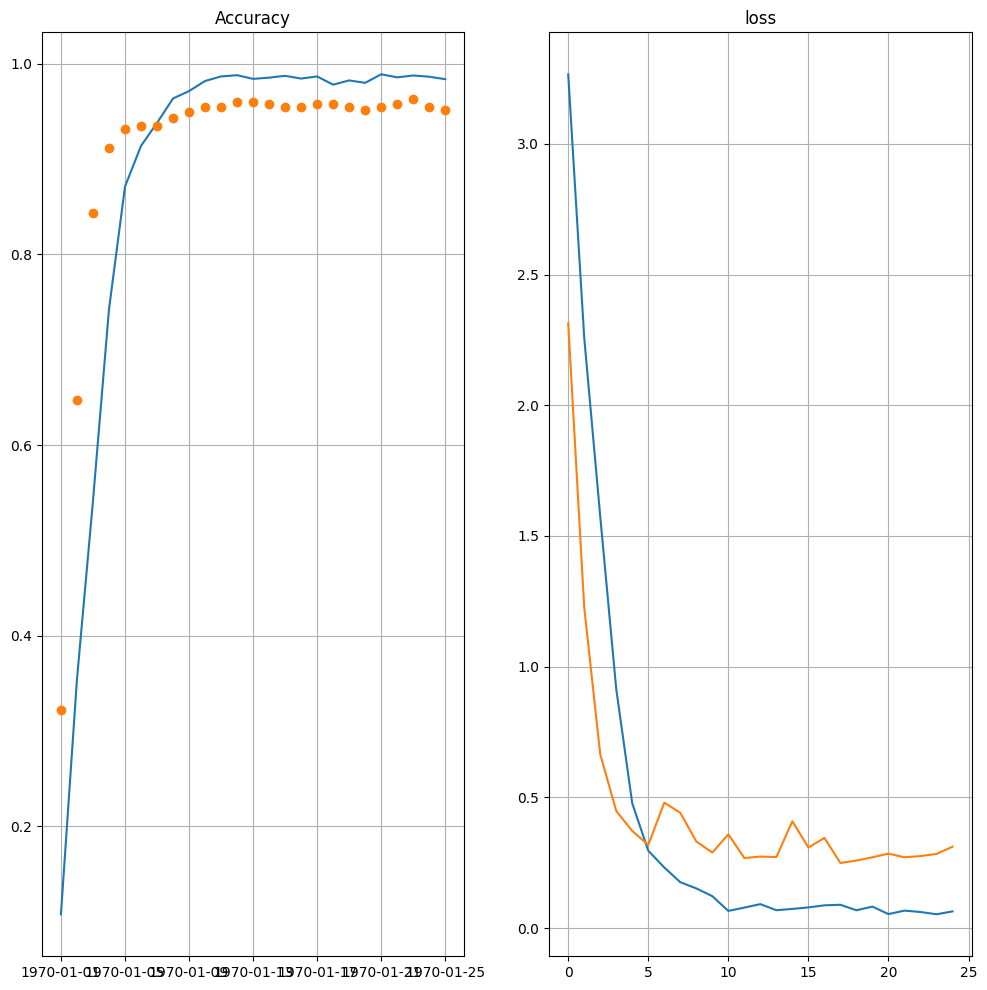

In [31]:
epcohs_range = range(N_EPOCH)
plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.plot(epcohs_range, history.history['acc'], label='Training Acc')
plt.plot_date(epcohs_range, history.history['val_acc'], label='Val acc')
plt.title('Accuracy')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epcohs_range, history.history['loss'], label='Training loss')
plt.plot(epcohs_range, history.history['val_loss'], label='Val loss')
plt.title('loss')
plt.grid()


In [46]:
img = '/home/mustafa/git_repo/Deep_Learning_Projects/fruits_vegetables_classification/Image_3.jpg'
img = tf.keras.utils.load_img(img, target_size=(IMG_HEIGHT, IMG_WIDTH))
img_arr = tf.keras.utils.array_to_img(img)
img_bat = tf.expand_dims(img_arr, 0)

In [ ]:
img = tf.keras.utils.load_img(img, target_size=(IMG_HEIGHT, IMG_WIDTH))
img_arr = tf.keras.utils.array_to_img(img)
img_bat = tf.expand_dims(img_arr, 0)

In [37]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 331ms/step


In [39]:
score = tf.nn.softmax(predict)

In [47]:
print(f'The image is {data_cat[np.argmax(score)]}')

The image is apple


In [48]:
model.save('veg_fruit.keras')